<a href="https://colab.research.google.com/github/faranak5171/Deep-Learning/blob/master/fashion_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [7]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


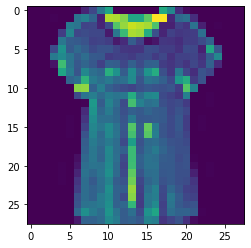

In [13]:
images, labels = next(iter(trainloader))
plt.imshow(images[8].squeeze().numpy())

In [16]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

In [17]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"training loss: {running_loss / len(trainloader)}")

training loss: 0.5068778726242499
training loss: 0.4008283065612128
training loss: 0.3710800048702561
training loss: 0.3470043579477872
training loss: 0.3393996762060153


Text(0.5, 1.0, 'T-shirt/top')

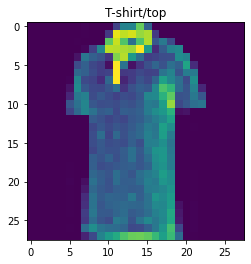

In [28]:
# Test network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(model.forward(img), dim=1)
cat_index = torch.argmax(ps)
categoris = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker"]
plt.imshow(images[0].squeeze().numpy())
plt.title(categoris[cat_index])